In [1]:
from IPython.display import HTML, display

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
</script>''')

In [2]:
#######################################################
#         WELCOME TO HR ANALYTIC - DATA FILE          #
#######################################################
#  TO HAVE A BETTER EXPERIENCE CLICK THE BUTTON THAT  #
# SAYS 'NO TRUSTED' TO CHANGE THE STATUS TO 'TRUSTED' #
#                                                     # 
#    SELECT OPTION KERNEL --> RESTART & RUN ALL       #
#######################################################
#   CLICK THE "VOILA" BUTTON ABOVE TO RUN AS AN APP   #
#######################################################
#                                                     #
#            THANK YOU - ALEJANDRA COLACILLI          #
#                                                     #
#######################################################

In [3]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [4]:
# Import train data and data to predict

try:
    train = pd.read_csv('https://raw.githubusercontent.com/Alecolacilli/Projects/master/general_data_total.csv')
except:
    print('File can not be opened. Please insert the training dataset file')
    
try:
    data = pd.read_csv('HR_Analytic_predict.csv')
except:
    data = pd.DataFrame()   

In [5]:
# Function to check and drop missing values
def find_missing_values(dataset, columns):
    if len(dataset) == 0:
        return dataset
    
    missing_values = {}
    ds_length = len(dataset)
    for column in columns:
        total_column_values = dataset[column].value_counts().sum()
        missing_values[column] = ds_length - total_column_values
        
    return missing_values

def drop_missing_values(dataset):
    if len(dataset) == 0:
        return dataset
        
    missing_vals = find_missing_values(dataset, columns=dataset.columns)
    to_drop = []
    for i in missing_vals:
        if missing_vals[i] > 0:
            to_drop.append(i)
    
    dataset = dataset.dropna(subset=to_drop)
    return dataset

train = drop_missing_values(train)
data = drop_missing_values(data)

In [6]:
# Create two new dataframes to analyze the data and compare
train_dis = pd.DataFrame() # for discretized continuous variables
train_con = pd.DataFrame() # for continuous variables

data_dis = pd.DataFrame() # for discretized continuous variables
data_con = pd.DataFrame() # for continuous variables

In [7]:
# Create a function to discretize the data for Marital Status with numerical values
def maritalStatus(row):
    if row.MaritalStatus == 'Married':
        return 1
    elif row.MaritalStatus == 'Single':
        return 2
    elif row.MaritalStatus == 'Divorced':
        return 3
    
# Create a function to discretize the data for Distance from Home grouping them by categories
def distance(row):
    if row.DistanceFromHome >= 0 and row.DistanceFromHome < 5:
        return 0
    elif row.DistanceFromHome >= 5 and row.DistanceFromHome < 10:
        return 1
    elif row.DistanceFromHome >= 10 and row.DistanceFromHome < 15:
        return 2
    elif row.DistanceFromHome >= 15 and row.DistanceFromHome < 20:
        return 3
    elif row.DistanceFromHome >= 20 and row.DistanceFromHome < 25:
        return 4
    elif row.DistanceFromHome >= 25 and row.DistanceFromHome < 30:
        return 5
    else:
        return 6
    
# Create a function to discretize the data for Total Working Years grouping them by categories
def work_years(row):
    if row.TotalWorkingYears >= 0 and row.TotalWorkingYears < 10:
        return 0
    elif row.TotalWorkingYears >= 10 and row.TotalWorkingYears < 20:
        return 1
    elif row.TotalWorkingYears >= 20 and row.TotalWorkingYears < 30:
        return 2
    elif row.TotalWorkingYears >= 30 and row.TotalWorkingYears <= 40:
        return 3
    else:
        return 4
    
# Create a function to discretize the data for Age grouping them by categories
def age_gen(row):
    if row.Age >= 0 and row.Age <= 21:       #Post-Millennials
        return 0
    elif row.Age >= 22 and row.Age <= 37:    #Millennials
        return 1
    elif row.Age >= 38 and row.Age <= 53:    #Generation X    
        return 2
    elif row.Age >= 54 and row.Age <= 72:    #Baby Boomers
        return 3
    else:                                    #The Silent Generation
        return 4                                                        
    
# Create a function to discretize the data for Number of Companies Worked grouping them by categories
def comp_worked(row):
    if row.NumCompaniesWorked >= 0 and row.NumCompaniesWorked < 2:      #Worked in less than 2 companies
        return 0
    elif row.NumCompaniesWorked >= 2 and row.NumCompaniesWorked < 4:    #Worked in 2 or 3 companies
        return 1
    elif row.NumCompaniesWorked >= 4 and row.NumCompaniesWorked < 6:    #Worked in 4 or 5 companies
        return 2
    elif row.NumCompaniesWorked >= 6 and row.NumCompaniesWorked < 8:    #Worked in 6 or 7 companies
        return 3
    else:                                                               #Worked in more than 8 companies
        return 4                                                        

# Create a function to discretize the data for Business Travel with numerical values
def bussTravel(row):
    if row.BusinessTravel == 'Non-Travel':
        return 0
    elif row.BusinessTravel == 'Travel_Rarely':
        return 1
    elif row.BusinessTravel == 'Travel_Frequently':
        return 2
    


In [8]:
# Unify discretized columns with one hot columns
def unify_columns(dataset):
    if len(dataset) == 0:
        return dataset
    
    # Convert to one hot
    df_job_one_hot = pd.get_dummies(dataset['JobRole'])
    df_dept_one_hot = pd.get_dummies(dataset['Department'], prefix='Dept')
    df_ed_one_hot = pd.get_dummies(dataset['EducationField'], prefix='Ed')

    # Discretized columns using above functions
    df_marStat = pd.DataFrame({'MaritalStatus': dataset.apply(maritalStatus, axis='columns')})
    df_distance = pd.DataFrame({'DistanceFromHome': dataset.apply(distance, axis='columns')})
    df_work_years = pd.DataFrame({'TotalWorkingYears': dataset.apply(work_years, axis='columns')})
    df_Age = pd.DataFrame({'Age': dataset.apply(age_gen, axis='columns')})
    df_comp_worked = pd.DataFrame({'NumCompaniesWorked': dataset.apply(comp_worked, axis='columns')})
    df_bussTravel = pd.DataFrame({'BusinessTravel': dataset.apply(bussTravel, axis='columns')})

    # Unify everythin in one dataset
    df_unify = pd.DataFrame()
    df_unify['JR_HealthRep'] = df_job_one_hot['Healthcare Representative']
    df_unify['JR_HHRR'] = df_job_one_hot['Human Resources']
    df_unify['JR_LabTec'] = df_job_one_hot['Laboratory Technician']
    df_unify['JR_Man'] = df_job_one_hot['Manager']
    df_unify['JR_MftDir'] = df_job_one_hot['Manufacturing Director']
    df_unify['JR_ResDir'] = df_job_one_hot['Research Director']
    df_unify['JR_ResSci'] = df_job_one_hot['Research Scientist']
    df_unify['JR_SaleExc'] = df_job_one_hot['Sales Executive']
    df_unify['JR_SaleRep'] = df_job_one_hot['Sales Representative']
    df_unify['MaritalStatus'] = df_marStat['MaritalStatus']
    df_unify['DistanceFromHome'] = df_distance['DistanceFromHome']
    df_unify['TotalWorkingYears'] = df_work_years['TotalWorkingYears']
    df_unify['Age'] = df_Age['Age']
    df_unify['NumCompaniesWorked'] = df_comp_worked['NumCompaniesWorked']
    df_unify['Dept_HHRR'] = df_dept_one_hot['Dept_Human Resources']
    df_unify['Dept_R&Dev'] = df_dept_one_hot['Dept_Research & Development']
    df_unify['Dept_Sales'] = df_dept_one_hot['Dept_Sales']
    df_unify['Ed_HHRR'] = df_ed_one_hot['Ed_Human Resources']
    df_unify['Ed_LifeSci'] = df_ed_one_hot['Ed_Life Sciences']
    df_unify['Ed_Mktg'] = df_ed_one_hot['Ed_Marketing']
    df_unify['Ed_Med'] = df_ed_one_hot['Ed_Medical']
    df_unify['Ed_Tech'] = df_ed_one_hot['Ed_Technical Degree']
    df_unify['Ed_Other'] = df_ed_one_hot['Ed_Other']
    df_unify['BusinessTravel'] = df_bussTravel['BusinessTravel']
    
    return df_unify

train_unify = unify_columns(train)
data_unify = unify_columns(data)


In [9]:
def fill_dataset(dataset, unified):
    if len(dataset) == 0:
        return dataset
    
    df_filled = pd.DataFrame()
      
    # Convert Gender "Female" and "Male" values to numerical values
    df_filled['Gender'] = dataset['Gender']
    df_filled['Gender'] = np.where(df_filled['Gender'] == 'Female', 1, 0) # change attrition value Male = 0 and Female = 1
    
    #Add the rest of the columns to the train and data datasets
    initial_columns = ['EmployeeID', 'MonthlyIncome', 'Man_PerformanceRating', 'PercentSalaryHike', 'JobLevel', 'Education', 'Man_JobInvolvement', 'StockOptionLevel', 'YearsAtCompany', 'Emp_EnvironmentSatisfaction', 'Emp_JobSatisfaction', 'Emp_WorkLifeBalance', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
    dataset_columns = ['EmployeeID', 'MonthlyIncome', 'PerformanceRating', 'PercentSalaryHike', 'JobLevel', 'Education', 'JobInvolvement', 'StockOptionLevel', 'YearsAtCompany', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

    #init_onehot_col = ['JobRole', 'Gender', 'MaritalStatus', 'DistanceFromHome', 'TotalWorkingYears', 'Age', 'NumCompaniesWorked', 'Department', ' EducationField', 'BusinessTravel']
    onehot_columns = ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative', 'MaritalStatus', 'DistanceFromHome', 'TotalWorkingYears', 'Age', 'NumCompaniesWorked', 'Dept_Human Resources', 'Dept_Research & Development', 'Dept_Sales', 'Ed_Human Resources', 'Ed_Life Sciences', 'Ed_Marketing', 'Ed_Medical', 'Ed_Technical Degree', 'Ed_Other', 'BusinessTravel']
    data_onehot_col = ['JR_HealthRep', 'JR_HHRR', 'JR_LabTec', 'JR_Man', 'JR_MftDir', 'JR_ResDir', 'JR_ResSci', 'JR_SaleExc', 'JR_SaleRep', 'MaritalStatus', 'DistanceFromHome', 'TotalWorkingYears', 'Age', 'NumCompaniesWorked', 'Dept_HHRR', 'Dept_R&Dev', 'Dept_Sales', 'Ed_HHRR', 'Ed_LifeSci', 'Ed_Mktg', 'Ed_Med', 'Ed_Tech', 'Ed_Other', 'BusinessTravel']

    
    df_filled[dataset_columns] = dataset[initial_columns]
    df_filled[data_onehot_col] = unified[data_onehot_col]
    
    return df_filled

train_dis = fill_dataset(train, train_unify)
data_dis = fill_dataset(data, data_unify)

# Convert attrition "Yes" and "No" values to numerical values and add to the train dataset
train_dis['Attrition'] = train['Attrition']
train_dis['Attrition'] = np.where(train_dis['Attrition'] == 'Yes', 1, 0) # change attrition value No = 0 and Yes = 1

In [10]:
# Save the clean dataset in a csv file
train_dis.to_csv('HR_Analytic_to_train.csv', index=False)
data_dis.to_csv('HR_Analytic_to_predict.csv', index=False)

In [11]:
# Create a new DataFrame to show the information with Qgrid, renaming the Columns
qgrid_plot = pd.DataFrame()
qgrid_plot['ID']=train_dis['EmployeeID']
qgrid_plot['Active']=train['Attrition']
qgrid_plot['Gender']=train['Gender']
qgrid_plot['Age']=train_dis['Age']
qgrid_plot['Marital ST']=train['MaritalStatus']
qgrid_plot['Income']=train_dis['MonthlyIncome']
qgrid_plot['Salary Hike']=train_dis['PercentSalaryHike']
qgrid_plot['Years in Co.']=train_dis['YearsAtCompany']
qgrid_plot['Job Role']=train['JobRole']
qgrid_plot['Job Level']=train_dis['JobLevel']
qgrid_plot['Department']=train['Department']
qgrid_plot['Performance']=train_dis['PerformanceRating']
qgrid_plot['Env. Satisf']=train_dis['EnvironmentSatisfaction']
qgrid_plot['Job Satisf']=train_dis['JobSatisfaction']
qgrid_plot['Job Involv']=train_dis['JobInvolvement']
qgrid_plot['Yr. since promo']=train_dis['YearsSinceLastPromotion']
qgrid_plot['No. training']=train_dis['TrainingTimesLastYear']
qgrid_plot['WorkLifeBalance']=train_dis['WorkLifeBalance']
qgrid_plot['YearsWithCurrManager']=train_dis['YearsWithCurrManager']
qgrid_plot['StockOptionLevel']=train_dis['StockOptionLevel']
qgrid_plot['TotalWorkingYears']=train_dis['TotalWorkingYears']
qgrid_plot['NumCompaniesWorked']=train_dis['NumCompaniesWorked']
qgrid_plot['Education']=train_dis['Education']
qgrid_plot['EducationField']=train['EducationField']
qgrid_plot['DistanceFromHome']=train_dis['DistanceFromHome']

qgrid_plot.to_csv('HR_Analytic_qgrid.csv', index=False)
train.to_csv('HR_Analytic_train.csv', index=False)

<h1 style="text-align: center;"><span style="color: #ff9900;">Data Analytic</span></h1>

The data analysis was done with more than 4,000 records as the initial load. These records were submitted by the last satisfaction survey performed by the company. 
75 % of these data were used for the training model and 25 % for the accuracy test.

<h2 style="text-align: left;"><span style="color: #ff9900;">Training Data Visualization</span></h2>

In [12]:
from IPython.display import HTML, display
import qgrid

col_defs = {
    'ID': {
        'width': 35
    },
    'Marital ST': {
        'width': 80
    },
    'Salary Hike': {
        'width': 85
    },
    'Salary Hike': {
        'width': 85
    },
    'Years in Co.': {
        'width': 85
    },
    'Job Role': {
        'width': 70
    },
    'Job Level': {
        'width': 70
    }
    
}

df_widget = qgrid.show_grid(qgrid_plot, show_toolbar=True, column_definitions=col_defs, grid_options={
    # SlickGrid options
    'fullWidthRows': True,
    'syncColumnCellResize': True,
    'forceFitColumns': False,
    'defaultColumnWidth': 65,
    'rowHeight': 25,
    'enableColumnReorder': True,
    'enableTextSelectionOnCells': True,
    'editable': False,
    'autoEdit': False,
    'explicitInitialization': True,
    'filter_dropdown_shown': True,

    # Qgrid options
    'maxVisibleRows': 15,
    'minVisibleRows': 8,
    'sortable': True,
    'filterable': True,
    'highlightSelectedCell': False,
    'highlightSelectedRow': True},
    
    column_options={
    # SlickGrid column options
    'defaultSortAsc': True,
    'maxWidth': 200,
    'minWidth': 10,
    'resizable': True,
    'sortable': True,
    'toolTip': "",
    'width': None
})
df_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

<h2 style="text-align: left;"><span style="color: #ff9900;">Total Working Years & Age</span></h2>
There is a tendency to leave the company when the employees are younger, or when the number of years worked for the company is low.

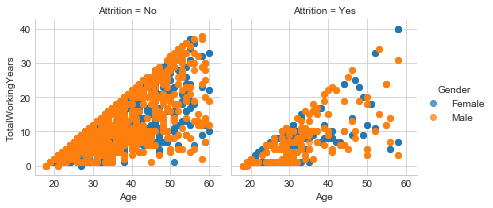

In [13]:
g = sns.FacetGrid(train, col="Attrition", hue="Gender")
g.map(plt.scatter, "Age", "TotalWorkingYears", alpha=.7);
g.add_legend();

<h2 style="text-align: left;"><span style="color: #ff9900;">Monthly Income & Age</span></h2>
The salary appears to be a key factor when it comes to deciding whether to stay or leave the company.  One of the biggest reasons why younger employees leave the company is low salaries.

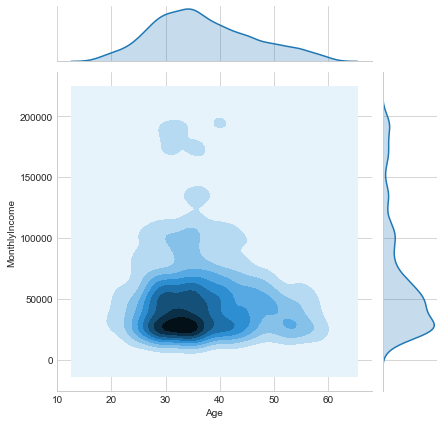

In [14]:
sns.jointplot(x="Age", y="MonthlyIncome", kind="kde", data=train);

<h2 style="text-align: left;"><span style="color: #ff9900;">Monthly Income & Years at Company</span></h2>
The number of years worked for the company is also a key factor when deciding to stay or leave the company. As we can see, those who have spent more years working for the company are more loyal even when their salaries are low.

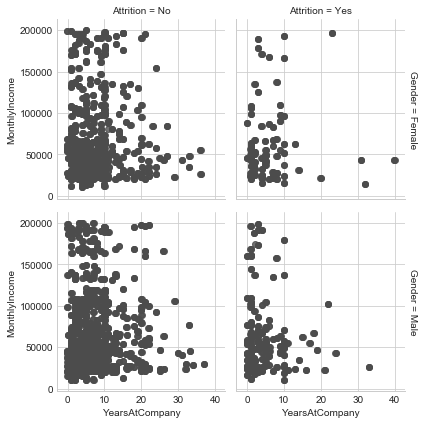

In [15]:
g = sns.FacetGrid(train, row="Gender", col="Attrition", margin_titles=True)
g.map(sns.regplot, "YearsAtCompany", "MonthlyIncome", color=".3", fit_reg=False, x_jitter=.1);

<a href="#" button type="button" class="btn btn-primary btn-lg btn-block">Continue with the HR_Analytics-Prediction.ipynb Notebook ---></a>

<a href="#" button type="button" class="btn btn-primary btn-lg btn-block"> <--- Go back to HR_Analytics-InitialApp.ipynb Notebook</a>